In [ ]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
pip install shapely

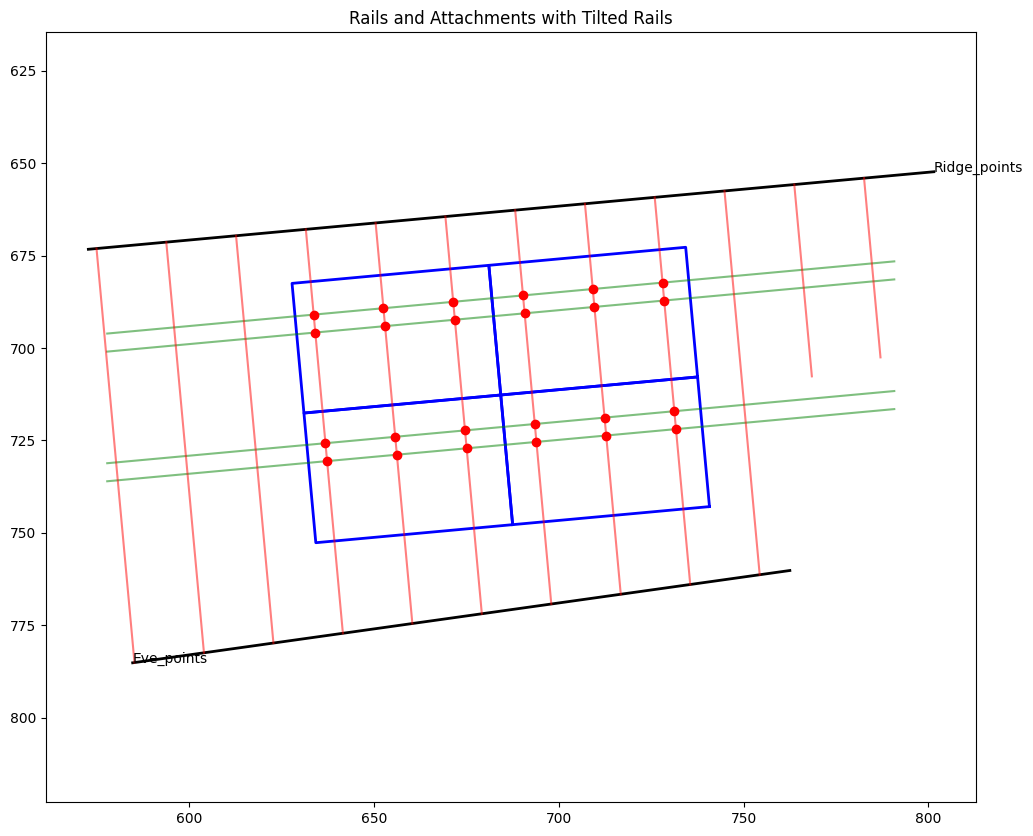

The attachment points are: [(728.050323469139, 682.3199824588754), (709.1717026930085, 684.0513170681817), (690.2930819168778, 685.7826516774879), (728.4944756809401, 687.163056194248), (709.6158549048096, 688.8943908035543), (690.7372341286789, 690.6257254128606), (671.4144611407473, 687.5139862867942), (652.5358403646167, 689.2453208961005), (633.6572195884862, 690.9766555054068), (671.8586133525484, 692.3570600221668), (652.9799925764178, 694.0883946314731), (634.1013718002873, 695.8197292407793), (731.2408860776711, 717.1101502434342), (712.3622653015406, 718.8414848527405), (693.4836445254099, 720.5728194620467), (731.6850382894722, 721.9532239788068), (712.8064175133417, 723.6845585881131), (693.927796737211, 725.4158931974193), (674.6050237492793, 722.304154071353), (655.7264029731488, 724.0354886806592), (636.8477821970182, 725.7668232899655), (675.0491759610804, 727.1472278067256), (656.1705551849499, 728.8785624160319), (637.2919344088193, 730.6098970253381)]


In [34]:
from shapely.geometry import Polygon, LineString, Point
import matplotlib.pyplot as plt
import numpy as np
import math

polygon_coords = [
    [
        (737.5289670029157, 707.8383607522512),
        (734.3115701872882, 672.7555904766095),
        (681.0581274146199, 677.639396853694),
        (684.2755242302474, 712.722167129336),
    ],
    [
        (684.2755242302474, 712.722167129336),
        (681.0581274146199, 677.639396853694),
        (627.8046846419517, 682.5232032307786),
        (631.0220814575791, 717.6059735064207),
    ],
    [
        (740.7463638185432, 742.9211310278939),
        (737.5289670029157, 707.838360752251),
        (684.2755242302472, 712.7221671293355),
        (687.4929210458748, 747.8049374049787),
    ],
    [
        (687.4929210458748, 747.8049374049787),
        (684.2755242302472, 712.7221671293355),
        (631.022081457579, 717.6059735064209),
        (634.2394782732066, 752.6887437820634),
    ],
]

after_firesetback_points = [
    [563.4131960920918, 683.849716230086],
    [571.2566964320002, 755.1586873236586],
    [721.4685234571397, 734.9041510984856],
    [718.5632461220539, 690.3538023020934],
    [758.5022503287624, 680.3684319624299],
    [757.2853517793179, 662.1138215783843],
    [563.4131960920918, 683.849716230086],
]

ridge_points = (
    [[801.448703847506, 652.3204787645773], [572.7011922497333, 673.298625861141]],
)
eve_points = (
    [[584.6879614164287, 785.1820770428143], [762.4917040557457, 760.208092404048]],
)

rafter_lines = [
    [[782.5700830713754, 654.0518133738835], [787.0169586488396, 702.5409253077241]],
    [[763.6914622952448, 655.7831479831898], [768.4505487273535, 707.6766338002399]],
    [[744.8128415191143, 657.514482592496], [754.3358016835114, 761.353655357538]],
    [[725.9342207429837, 659.2458172018023], [735.5405090690848, 763.9936073746672]],
    [[707.0555999668532, 660.9771518111086], [716.7452164546582, 766.6335593917966]],
    [[688.1769791907225, 662.7084864204148], [697.9499238402316, 769.2735114089259]],
    [[669.2983584145919, 664.4398210297212], [679.1546312258051, 771.9134634260552]],
    [[650.4197376384614, 666.1711556390275], [660.3593386113785, 774.5534154431845]],
    [[631.5411168623308, 667.9024902483337], [641.564045996952, 777.1933674603138]],
    [[612.6624960862002, 669.63382485764], [622.7687533825255, 779.8333194774431]],
    [[593.7838753100697, 671.3651594669462], [603.9734607680989, 782.4732714945724]],
    [[574.9052545339391, 673.0964940762525], [585.1781681536723, 785.1132235117018]],
]

# Create polygon objects
polygons = [Polygon(coords) for coords in polygon_coords]

# Calculate polygon boundaries
min_x = min(min(x for x, y in poly) for poly in polygon_coords)
max_x = max(max(x for x, y in poly) for poly in polygon_coords)
min_y = min(min(y for x, y in poly) for poly in polygon_coords)
max_y = max(max(y for x, y in poly) for poly in polygon_coords)

# Create vertical line segments as LineString objects
vertical_lines = []
for segment in rafter_lines:
    start, end = segment
    line = LineString([(start[0], start[1]), (end[0], end[1])])
    vertical_lines.append(line)

# Ridge and eve line segments
new_ridge_lines = []
new_eve_lines = []
for segment in ridge_points:
    start, end = segment
    line = LineString([(start[0], start[1]), (end[0], end[1])])
    new_ridge_lines.append(line)

for segment in eve_points:
    start, end = segment
    line = LineString([(start[0], start[1]), (end[0], end[1])])
    new_eve_lines.append(line)

# Calculate the angle of the ridge line to tilt the rails
ridge_start = ridge_points[0][0]
ridge_end = ridge_points[0][1]
ridge_angle = math.atan2(ridge_end[1] - ridge_start[1], ridge_end[0] - ridge_start[0])

# Create tilted horizontal rails that follow the ridge line angle
horizontal_lines = []
for poly_coords in polygon_coords:
    # Get y-coordinates of the polygon
    y_coords = [y for _, y in poly_coords]
    poly_min_y = min(y_coords)
    poly_max_y = max(y_coords)
    
    # Create 2 evenly spaced horizontal lines within this specific polygon's y-range
    # adjusted to follow the ridge angle
    rel_y1 = poly_min_y + (poly_max_y - poly_min_y) / 3  # At 1/3 of height
    rel_y2 = poly_min_y + 2 * (poly_max_y - poly_min_y) / 3  # At 2/3 of height
    
    # Extend the line from ridge to beyond the polygons
    leftmost_x = min(min(x for x, _ in poly_coords) for poly_coords in polygon_coords) - 50
    rightmost_x = max(max(x for x, _ in poly_coords) for poly_coords in polygon_coords) + 50
    
    # Calculate the perpendicular distance along the ridge line for each rail
    # Find a point on the ridge line to use as reference
    ref_x = (ridge_start[0] + ridge_end[0]) / 2
    ref_y = (ridge_start[1] + ridge_end[1]) / 2
    
    # Calculate offset distances with ridge angle
    offset1 = rel_y1 - ref_y
    offset2 = rel_y2 - ref_y
    
    # Calculate rail endpoints following ridge angle
    line1_start_x = leftmost_x
    line1_start_y = ref_y + offset1 + (leftmost_x - ref_x) * math.tan(ridge_angle)
    line1_end_x = rightmost_x
    line1_end_y = ref_y + offset1 + (rightmost_x - ref_x) * math.tan(ridge_angle)
    
    line2_start_x = leftmost_x
    line2_start_y = ref_y + offset2 + (leftmost_x - ref_x) * math.tan(ridge_angle)
    line2_end_x = rightmost_x
    line2_end_y = ref_y + offset2 + (rightmost_x - ref_x) * math.tan(ridge_angle)
    
    # Create the tilted horizontal lines
    line1 = LineString([(line1_start_x, line1_start_y), (line1_end_x, line1_end_y)])
    # line2 = LineString([(line2_start_x, line2_start_y), (line2_end_x, line2_end_y)])
    
    horizontal_lines.append(line1)
    # horizontal_lines.append(line2)

# Find intersections
h_v_intersections = []
for polygon in polygons:
    for h_line in horizontal_lines:
        for v_line in vertical_lines:
            h_v_point = h_line.intersection(v_line)
            if not h_v_point.is_empty and isinstance(h_v_point, Point) and polygon.contains(h_v_point):
                h_v_intersections.append((h_v_point.x, h_v_point.y))

plt.figure(figsize=(12, 10))

# Plot polygons
for polygon in polygons:
    x, y = polygon.exterior.xy
    plt.plot(x, y, 'b-', linewidth=2)

# Plot the ridge points
for points in new_ridge_lines:
    x, y = points.xy
    plt.plot(x, y, 'k-', linewidth=2)
    plt.text(x[0], y[0], 'Ridge_points', fontsize=10)

# Plot the eve points
for points in new_eve_lines:
    x, y = points.xy
    plt.plot(x, y, 'k-', linewidth=2)
    plt.text(x[0], y[0], 'Eve_points', fontsize=10)

# Plot tilted horizontal lines (rails)
for line in horizontal_lines:
    x, y = line.xy
    plt.plot(x, y, 'g-', alpha=0.5)

# Plot vertical lines (rafters)
for line in vertical_lines:
    x, y = line.xy
    plt.plot(x, y, 'r-', alpha=0.5)

# Plot horizontal-vertical intersections inside polygons (attachment points)
for point in h_v_intersections:
    plt.plot(point[0], point[1], 'ro', markersize=6)

# Get all x and y values for plot limits
x_values = [coord[0] for poly in polygon_coords for coord in poly] + \
           [seg[0][0] for seg in rafter_lines] + [seg[1][0] for seg in rafter_lines] + \
           [seg[0][0] for seg in ridge_points] + [seg[1][0] for seg in ridge_points] + \
           [seg[0][0] for seg in eve_points] + [seg[1][0] for seg in eve_points]
           
y_values = [coord[1] for poly in polygon_coords for coord in poly] + \
           [seg[0][1] for seg in rafter_lines] + [seg[1][1] for seg in rafter_lines] + \
           [seg[0][1] for seg in ridge_points] + [seg[1][1] for seg in ridge_points] + \
           [seg[0][1] for seg in eve_points] + [seg[1][1] for seg in eve_points]

# Set plot limits with some padding
plt.xlim(min(x_values) - 50, max(x_values) + 50)
plt.ylim(min(y_values) - 50, max(y_values) + 50)

plt.title('Rails and Attachments with Tilted Rails')
plt.grid(False)
plt.axis('equal')
plt.gca().invert_yaxis()
plt.show()

attachment_points = [item for item in h_v_intersections]
print("The attachment points are:", attachment_points)

# EXPERIMENT 2

In [ ]:
pip install shapely

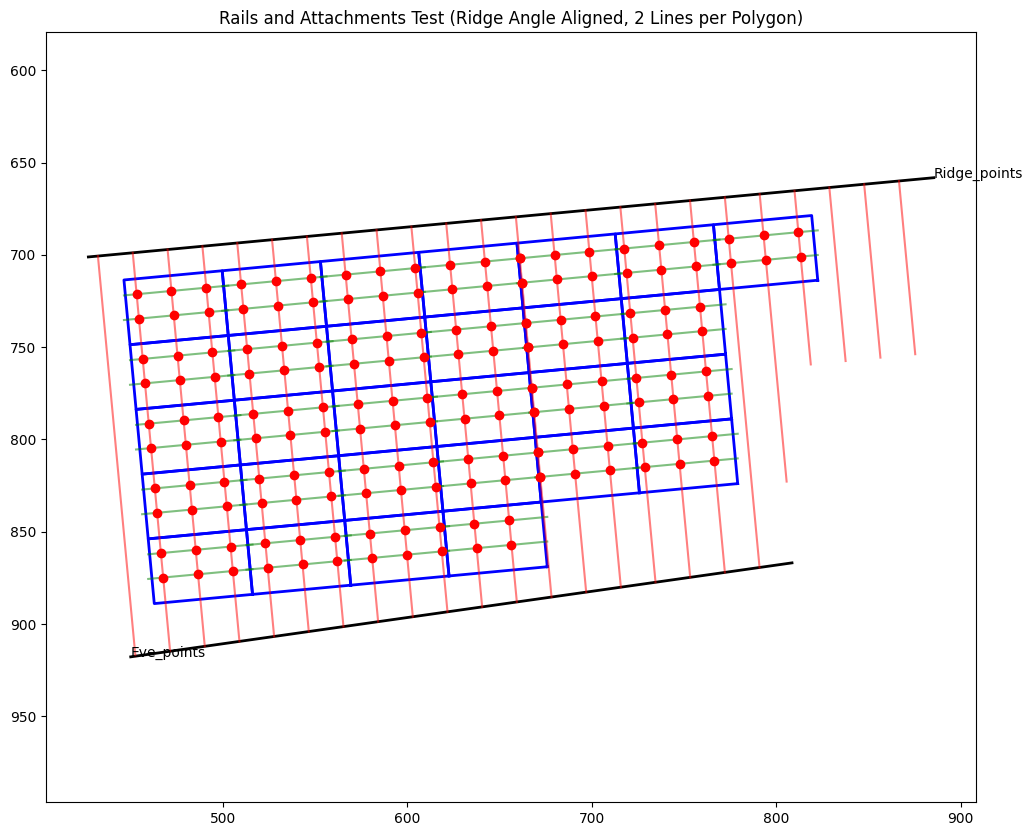

Attachment points: [(812.0185724614914, 687.6668399490442), (793.1434555053357, 689.4359587191866), (774.26833854918, 691.205077489329), (813.2593305393607, 700.9047605620228), (794.384213583205, 702.6738793321653), (775.5090966270493, 704.4429981023077), (755.3932215930244, 692.9741962594715), (736.5181046368687, 694.743315029614), (717.6429876807131, 696.5124337997564), (756.6339796708936, 706.2121168724501), (737.7588627147379, 707.9812356425925), (718.8837457585823, 709.750354412735), (698.7678707245573, 698.281552569899), (679.8927537684017, 700.0506713400414), (661.017636812246, 701.8197901101838), (700.0086288024265, 711.5194731828776), (681.133511846271, 713.28859195302), (662.2583948901153, 715.0577107231625), (661.017636812246, 701.8197901101839), (662.2583948901153, 715.0577107231624), (642.1425198560904, 703.5889088803264), (623.2674028999347, 705.3580276504688), (643.3832779339596, 716.8268294933048), (624.508160977804, 718.5959482634472), (604.392285943779, 707.1271464206

In [45]:
from shapely.geometry import Polygon, LineString, Point
import matplotlib.pyplot as plt
import numpy as np




#TODO : 
# first plot the polygon points and the rafter lines 
# draw parallel lines (horizontal) 2 lines each polygon
# the parallel lines should be in the angle of the ridge_points
# mark the 
#REFACTOR:  
# the intersection points should be on the start and end of the plane with the modules
# the horizondal line should be 25% from the start and 25% from the end 



# portrait_formula : 9.8 * cos(pitch)
# landscape_formula : 22.6 * cos(pitch)

module_orientation = "landscape"
lancscape_coords = [
    [
        [822.5074776674039, 713.7043146606048],
        [819.2198652862223, 678.6280556504153],
        [765.9763062057334, 683.6184448478589],
        [769.2639185869148, 718.6947038580483],
    ],
    [
        [769.2639185869148, 718.6947038580483],
        [765.9763062057334, 683.6184448478589],
        [712.7327471252441, 688.6088340453025],
        [716.0203595064256, 723.6850930554917],
    ],
    [
        [716.0203595064256, 723.6850930554917],
        [712.7327471252441, 688.6088340453025],
        [659.489188044755, 693.5992232427461],
        [662.7768004259365, 728.6754822529352],
    ],
    [
        [662.7768004259365, 728.6754822529352],
        [659.489188044755, 693.5992232427461],
        [606.2456289642658, 698.5896124401888],
        [609.5332413454473, 733.6658714503786],
    ],
    [
        [609.5332413454473, 733.6658714503786],
        [606.2456289642658, 698.5896124401888],
        [553.0020698837767, 703.5800016376324],
        [556.2896822649582, 738.6562606478221],
    ],
    [
        [556.2896822649582, 738.6562606478221],
        [553.0020698837767, 703.5800016376324],
        [499.75851080328766, 708.5703908350761],
        [503.04612318446914, 743.6466498452655],
    ],
    [
        [503.04612318446914, 743.6466498452655],
        [499.75851080328766, 708.5703908350761],
        [446.5149517227985, 713.5607800325197],
        [449.80256410398, 748.6370390427089],
    ],
    [
        [772.5515309680961, 753.7709628682376],
        [769.2639185869147, 718.6947038580474],
        [716.0203595064256, 723.6850930554929],
        [719.307971887607, 758.761352065681],
    ],
    [
        [719.307971887607, 758.761352065681],
        [716.0203595064256, 723.6850930554929],
        [662.7768004259364, 728.6754822529356],
        [666.0644128071178, 763.7517412631245],
    ],
    [
        [666.0644128071178, 763.7517412631245],
        [662.7768004259364, 728.6754822529356],
        [609.5332413454472, 733.6658714503792],
        [612.8208537266287, 768.7421304605679],
    ],
    [
        [612.8208537266287, 768.7421304605679],
        [609.5332413454472, 733.6658714503792],
        [556.2896822649582, 738.6562606478228],
        [559.5772946461395, 773.7325196580114],
    ],
    [
        [559.5772946461395, 773.7325196580114],
        [556.2896822649582, 738.6562606478228],
        [503.04612318446914, 743.6466498452664],
        [506.3337355656505, 778.7229088554548],
    ],
    [
        [506.3337355656505, 778.7229088554548],
        [503.04612318446914, 743.6466498452664],
        [449.80256410398, 748.6370390427101],
        [453.09017648516135, 783.7132980528982],
    ],
    [
        [775.8391433492775, 788.8472218784269],
        [772.551530968096, 753.7709628682369],
        [719.3079718876068, 758.7613520656805],
        [722.5955842687883, 793.8376110758703],
    ],
    [
        [722.5955842687883, 793.8376110758703],
        [719.3079718876068, 758.7613520656805],
        [666.0644128071176, 763.7517412631241],
        [669.3520251882992, 798.8280002733138],
    ],
    [
        [669.3520251882992, 798.8280002733138],
        [666.0644128071176, 763.7517412631241],
        [612.8208537266286, 768.7421304605668],
        [616.10846610781, 803.8183894707572],
    ],
    [
        [616.10846610781, 803.8183894707572],
        [612.8208537266286, 768.7421304605668],
        [559.5772946461394, 773.7325196580105],
        [562.8649070273209, 808.8087786682007],
    ],
    [
        [562.8649070273209, 808.8087786682007],
        [559.5772946461394, 773.7325196580105],
        [506.33373556565033, 778.7229088554541],
        [509.62134794683186, 813.7991678656441],
    ],
    [
        [509.62134794683186, 813.7991678656441],
        [506.33373556565033, 778.7229088554541],
        [453.0901764851611, 783.7132980528977],
        [456.3777888663427, 818.7895570630875],
    ],
    [
        [779.1267557304589, 823.9234808886162],
        [775.8391433492774, 788.8472218784282],
        [722.5955842687882, 793.8376110758709],
        [725.8831966499697, 828.9138700860597],
    ],
    [
        [725.8831966499697, 828.9138700860597],
        [722.5955842687882, 793.8376110758709],
        [669.3520251882992, 798.8280002733145],
        [672.6396375694806, 833.904259283503],
    ],
    [
        [672.6396375694806, 833.904259283503],
        [669.3520251882992, 798.8280002733145],
        [616.1084661078099, 803.8183894707572],
        [619.3960784889914, 838.8946484809466],
    ],
    [
        [619.3960784889914, 838.8946484809466],
        [616.1084661078099, 803.8183894707572],
        [562.8649070273208, 808.8087786682008],
        [566.1525194085023, 843.88503767839],
    ],
    [
        [566.1525194085023, 843.88503767839],
        [562.8649070273208, 808.8087786682008],
        [509.62134794683175, 813.7991678656435],
        [512.9089603280132, 848.8754268758335],
    ],
    [
        [512.9089603280132, 848.8754268758335],
        [509.62134794683175, 813.7991678656435],
        [456.3777888663426, 818.7895570630876],
        [459.6654012475241, 853.8658160732768],
    ],
    [
        [675.9272499506619, 868.9805182936924],
        [672.6396375694804, 833.904259283503],
        [619.3960784889914, 838.8946484809476],
        [622.6836908701728, 873.9709074911358],
    ],
    [
        [622.6836908701728, 873.9709074911358],
        [619.3960784889914, 838.8946484809476],
        [566.1525194085023, 843.8850376783912],
        [569.4401317896836, 878.9612966885793],
    ],
    [
        [569.4401317896836, 878.9612966885793],
        [566.1525194085023, 843.8850376783912],
        [512.9089603280131, 848.8754268758339],
        [516.1965727091946, 883.9516858860227],
    ],
    [
        [516.1965727091946, 883.9516858860227],
        [512.9089603280131, 848.8754268758339],
        [459.66540124752396, 853.8658160732771],
        [462.95301362870543, 888.9420750834661],
    ],
]


portrait_corods = [
    [
        [842.3775545539658, 730.1688379146426],
        [837.387165356522, 676.9252788341528],
        [802.3109063463328, 680.2128912153348],
        [807.3012955437765, 733.456450295824],
    ],
    [
        [807.3012955437765, 733.456450295824],
        [802.3109063463328, 680.2128912153348],
        [767.2346473361434, 683.500503596515],
        [772.2250365335872, 736.7440626770053],
    ],
    [
        [772.2250365335872, 736.7440626770053],
        [767.2346473361434, 683.500503596515],
        [732.1583883259543, 686.7881159776971],
        [737.1487775233979, 740.0316750581867],
    ],
    [
        [737.1487775233979, 740.0316750581867],
        [732.1583883259543, 686.7881159776971],
        [697.082129315765, 690.0757283588782],
        [702.0725185132086, 743.319287439368],
    ],
    [
        [702.0725185132086, 743.319287439368],
        [697.082129315765, 690.0757283588782],
        [662.0058703055756, 693.3633407400603],
        [666.9962595030192, 746.6068998205494],
    ],
    [
        [666.9962595030192, 746.6068998205494],
        [662.0058703055756, 693.3633407400603],
        [626.9296112953864, 696.6509531212414],
        [631.92000049283, 749.8945122017307],
    ],
    [
        [631.92000049283, 749.8945122017307],
        [626.9296112953864, 696.6509531212414],
        [591.853352285197, 699.9385655024225],
        [596.8437414826407, 753.182124582912],
    ],
    [
        [596.8437414826407, 753.182124582912],
        [591.853352285197, 699.9385655024225],
        [556.7770932750077, 703.2261778836037],
        [561.7674824724513, 756.4697369640934],
    ],
    [
        [561.7674824724513, 756.4697369640934],
        [556.7770932750077, 703.2261778836037],
        [521.7008342648185, 706.5137902647857],
        [526.6912234622621, 759.7573493452747],
    ],
    [
        [526.6912234622621, 759.7573493452747],
        [521.7008342648185, 706.5137902647857],
        [486.6245752546291, 709.8014026459668],
        [491.6149644520728, 763.0449617264561],
    ],
    [
        [491.6149644520728, 763.0449617264561],
        [486.6245752546291, 709.8014026459668],
        [451.54831624443983, 713.0890150271489],
        [456.53870544188345, 766.3325741076375],
    ],
    [
        [777.2154257310307, 789.9876217574945],
        [772.225036533587, 736.7440626770049],
        [737.1487775233978, 740.031675058186],
        [742.1391667208414, 793.2752341386758],
    ],
    [
        [742.1391667208414, 793.2752341386758],
        [737.1487775233978, 740.031675058186],
        [702.0725185132084, 743.3192874393671],
        [707.0629077106521, 796.5628465198572],
    ],
    [
        [707.0629077106521, 796.5628465198572],
        [702.0725185132084, 743.3192874393671],
        [666.9962595030191, 746.6068998205492],
        [671.9866487004628, 799.8504589010385],
    ],
    [
        [671.9866487004628, 799.8504589010385],
        [666.9962595030191, 746.6068998205492],
        [631.9200004928297, 749.8945122017303],
        [636.9103896902734, 803.1380712822198],
    ],
    [
        [636.9103896902734, 803.1380712822198],
        [631.9200004928297, 749.8945122017303],
        [596.8437414826406, 753.1821245829115],
        [601.8341306800842, 806.4256836634012],
    ],
    [
        [601.8341306800842, 806.4256836634012],
        [596.8437414826406, 753.1821245829115],
        [561.7674824724513, 756.4697369640926],
        [566.7578716698949, 809.7132960445825],
    ],
    [
        [566.7578716698949, 809.7132960445825],
        [561.7674824724513, 756.4697369640926],
        [526.691223462262, 759.7573493452746],
        [531.6816126597056, 813.0009084257639],
    ],
    [
        [531.6816126597056, 813.0009084257639],
        [526.691223462262, 759.7573493452746],
        [491.6149644520726, 763.0449617264558],
        [496.60535364951625, 816.2885208069453],
    ],
    [
        [496.60535364951625, 816.2885208069453],
        [491.6149644520726, 763.0449617264558],
        [456.53870544188334, 766.3325741076378],
        [461.52909463932696, 819.5761331881266],
    ],
    [
        [782.2058149284741, 843.2311808379836],
        [777.2154257310305, 789.9876217574938],
        [742.139166720841, 793.2752341386749],
        [747.1295559182847, 846.518793219165],
    ],
    [
        [747.1295559182847, 846.518793219165],
        [742.139166720841, 793.2752341386749],
        [707.0629077106519, 796.5628465198579],
        [712.0532969080955, 849.8064056003464],
    ],
    [
        [712.0532969080955, 849.8064056003464],
        [707.0629077106519, 796.5628465198579],
        [671.9866487004625, 799.850458901039],
        [676.9770378979061, 853.0940179815277],
    ],
    [
        [676.9770378979061, 853.0940179815277],
        [671.9866487004625, 799.850458901039],
        [636.9103896902732, 803.1380712822192],
        [641.9007788877168, 856.381630362709],
    ],
    [
        [641.9007788877168, 856.381630362709],
        [636.9103896902732, 803.1380712822192],
        [601.834130680084, 806.4256836634013],
        [606.8245198775276, 859.6692427438903],
    ],
    [
        [606.8245198775276, 859.6692427438903],
        [601.834130680084, 806.4256836634013],
        [566.7578716698946, 809.7132960445815],
        [571.7482608673383, 862.9568551250717],
    ],
    [
        [571.7482608673383, 862.9568551250717],
        [566.7578716698946, 809.7132960445815],
        [531.6816126597053, 813.0009084257626],
        [536.672001857149, 866.244467506253],
    ],
    [
        [536.672001857149, 866.244467506253],
        [531.6816126597053, 813.0009084257626],
        [496.60535364951613, 816.2885208069456],
        [501.5957428469597, 869.5320798874344],
    ],
    [
        [501.5957428469597, 869.5320798874344],
        [496.60535364951613, 816.2885208069456],
        [461.5290946393267, 819.5761331881258],
        [466.51948383677035, 872.8196922686158],
    ],
]




ridge_points = (
    [[885.4151069433566, 658.1430376552173],
    [427.2352488971326, 701.0871205371207]],
)
eve_points = (
    [[450.19415245936176, 917.8049341504471],
    [808.552690669807, 866.8712544533059]],
)

after_set_back_points = [
    [442.8906323590193, 713.9004786648696],
    [462.7811529560261, 901.6546596835915],
    [793.4966910830967, 854.6498935241202],
    [786.4704153383078, 748.2001587268123],
    [878.043673226332, 739.2375401118809],
    [872.4634243667117, 673.6376664529721],
    [442.8906323590193, 713.9004786648696],
]




polygon_coords = lancscape_coords if module_orientation == 'landscape' else portrait_corods

rafter_lines = [
    [[866.5399899872009, 659.9121564253597], [875.338800284868, 753.7885971971191]],
    [[847.6648730310452, 661.6812751955022], [856.470951752996, 755.6352643833216]],
    [[828.7897560748895, 663.4503939656446], [837.6031032211243, 757.481931569524]],
    [[809.9146391187339, 665.219512735787], [818.7352546892527, 759.3285987557256]],
    [[791.0395221625782, 666.9886315059294], [805.6446941332941, 822.8144210258861]],
    [[772.1644052064225, 668.7577502760719], [790.967365465647, 869.3706655899614]],
    [[753.2892882502668, 670.5268690462143], [772.1767533211356, 872.041384767077]],
    [[734.4141712941112, 672.2959878163567], [753.3861411766243, 874.7121039441926]],
    [[715.5390543379556, 674.0651065864992], [734.5955290321131, 877.3828231213082]],
    [[696.6639373817998, 675.8342253566416], [715.8049168876015, 880.0535422984238]],
    [[677.7888204256442, 677.603344126784], [697.0143047430903, 882.7242614755394]],
    [[658.9137034694885, 679.3724628969264], [678.2236925985789, 885.394980652655]],
    [[640.0385865133328, 681.1415816670689], [659.4330804540676, 888.0656998297707]],
    [[621.1634695571772, 682.9107004372113], [640.6424683095562, 890.7364190068863]],
    [[602.2883526010215, 684.6798192073537], [621.8518561650449, 893.4071381840018]],
    [[583.4132356448658, 686.4489379774961], [603.0612440205334, 896.0778573611175]],
    [[564.5381186887103, 688.2180567476386], [584.2706318760222, 898.748576538233]],
    [[545.6630017325544, 689.987175517781], [565.4800197315108, 901.4192957153487]],
    [[526.7878847763989, 691.7562942879234], [546.6894075869994, 904.0900148924643]],
    [[507.9127678202432, 693.5254130580659], [527.8987954424881, 906.7607340695799]],
    [[489.03765086408754, 695.2945318282083], [509.1081832979767, 909.4314532466955]],
    [[470.1625339079319, 697.0636505983507], [490.31757115346545, 912.1021724238111]],
    [[451.2874169517762, 698.8327693684931], [471.52695900895407, 914.7728916009268]],
    [[432.4122999956206, 700.6018881386356], [452.73634686444274, 917.4436107780423]],
]


# Create polygon objects
polygons = [Polygon(coords) for coords in polygon_coords]

# Calculate polygon boundaries
min_x = min(min(x for x, y in poly) for poly in polygon_coords)
max_x = max(max(x for x, y in poly) for poly in polygon_coords)
min_y = min(min(y for x, y in poly) for poly in polygon_coords)
max_y = max(max(y for x, y in poly) for poly in polygon_coords)

# Create vertical line segments as LineString objects
vertical_lines = []
for segment in rafter_lines:
    start, end = segment
    line = LineString([(start[0], start[1]), (end[0], end[1])])
    vertical_lines.append(line)



# rafter and eve line segements


new_ridge_lines = []
new_eve_lines = []
for segment in ridge_points:
    start, end = segment
    line = LineString([(start[0], start[1]), (end[0], end[1])])
    new_ridge_lines.append(line)




for segment in eve_points:
    start, end = segment
    line = LineString([(start[0], start[1]), (end[0], end[1])])
    new_eve_lines.append(line)
# # Create exactly 2 horizontal lines per polygon - FIXED CODE

# FIXME : rail lines draw
# RECHECK: recheck requied on the rails with 2 lines per polygon



from shapely.geometry import Polygon, LineString, Point
import matplotlib.pyplot as plt
import numpy as np


from shapely.geometry import Polygon, LineString, Point
import matplotlib.pyplot as plt
import numpy as np

# ... (Keep your existing data: polygon_coords, rafter_lines, ridge_points, eve_points, etc.)

# Calculate the angle from ridge_points
ridge_coords = ridge_points[0]
ridge_start, ridge_end = ridge_coords
ridge_dx = ridge_end[0] - ridge_start[0]
ridge_dy = ridge_end[1] - ridge_start[1]
ridge_angle = np.arctan2(ridge_dy, ridge_dx)

# Create polygon objects
polygons = [Polygon(coords) for coords in polygon_coords]

# Get rafter x-range for reference
rafter_x_coords = [x for line in rafter_lines for x, _ in line]
min_rafter_x = min(rafter_x_coords)
max_rafter_x = max(rafter_x_coords)

# Create 2 horizontal lines per polygon, evenly spaced
horizontal_lines = []
for polygon in polygons:
    # Get x and y ranges for the polygon
    x_coords, y_coords = polygon.exterior.xy
    poly_min_x = min(x_coords)
    poly_max_x = max(x_coords)
    poly_min_y = min(y_coords)
    poly_max_y = max(y_coords)
    
    # Calculate height range and evenly spaced y-positions (33.33% and 66.66%)
    height_range = poly_max_y - poly_min_y
    y1 = poly_min_y + 0.3333 * height_range  # ~33.33% from bottom
    y2 = poly_min_y + 0.6666 * height_range  # ~66.66% from bottom
    
    # Calculate line length based on polygon's x-range and ridge angle
    line_length = (poly_max_x - poly_min_x) / np.cos(ridge_angle)
    
    # Create lines with ridge angle starting at polygon's min_x
    x_start = poly_min_x
    x_end = x_start + line_length * np.cos(ridge_angle)
    
    line1_start = (x_start, y1)
    line1_end = (x_end, y1 + line_length * np.sin(ridge_angle))
    line2_start = (x_start, y2)
    line2_end = (x_end, y2 + line_length * np.sin(ridge_angle))
    
    horizontal_lines.append(LineString([line1_start, line1_end]))
    horizontal_lines.append(LineString([line2_start, line2_end]))

# Find all intersection points between polygons and horizontal lines
intersection_points = []
for polygon, h_line in zip(polygons, horizontal_lines[::2]):  # Pair with first line of each polygon
    if polygon.intersects(h_line):
        intersection = polygon.intersection(h_line)
        if intersection.geom_type == 'LineString':
            for x, y in intersection.coords:
                intersection_points.append((x, y))
        elif intersection.geom_type == 'MultiLineString':
            for line in intersection:
                for x, y in line.coords:
                    intersection_points.append((x, y))

# Find intersections between horizontal and vertical lines within polygons
h_v_intersections = []
for polygon in polygons:
    for h_line in horizontal_lines:
        for v_line in vertical_lines:
            h_v_point = h_line.intersection(v_line)
            if not h_v_point.is_empty and polygon.contains(h_v_point):
                h_v_intersections.append((h_v_point.x, h_v_point.y))

# Plotting
plt.figure(figsize=(12, 10))

# Plot polygons
for polygon in polygons:
    x, y = polygon.exterior.xy
    plt.plot(x, y, 'b-', linewidth=2)

# Plot ridge lines
for points in [LineString(ridge_points[0])]:
    x, y = points.xy
    plt.plot(x, y, 'k-', linewidth=2)
    plt.text(x[0], y[0], 'Ridge_points', fontsize=10)

# Plot eve lines
for points in [LineString(eve_points[0])]:
    x, y = points.xy
    plt.plot(x, y, 'k-', linewidth=2)
    plt.text(x[0], y[0], 'Eve_points', fontsize=10)

# Plot horizontal lines
for line in horizontal_lines:
    x, y = line.xy
    plt.plot(x, y, 'g-', alpha=0.5)

# Plot vertical lines
for line in vertical_lines:
    x, y = line.xy
    plt.plot(x, y, 'r-', alpha=0.5)

# Plot horizontal-vertical intersections inside polygons
for point in h_v_intersections:
    plt.plot(point[0], point[1], 'ro', markersize=6)

# Set plot limits
x_values = [coord[0] for poly in polygon_coords for coord in poly] + \
          [seg[0][0] for seg in rafter_lines] + [seg[1][0] for seg in rafter_lines]
y_values = [coord[1] for poly in polygon_coords for coord in poly] + \
          [seg[0][1] for seg in rafter_lines] + [seg[1][1] for seg in rafter_lines]

plt.xlim(min(x_values) - 50, max(x_values) + 50)
plt.ylim(min(y_values) - 50, max(y_values) + 50)

plt.title('Rails and Attachments Test (Ridge Angle Aligned, 2 Lines per Polygon)')
plt.grid(False)
plt.axis('equal')
plt.gca().invert_yaxis()
plt.show()

attachment_points = [item for item in h_v_intersections]
print("Attachment points:", attachment_points)
